# EJERCICIO 6 - PRACTICA 2

### El archivo Zoo.csv contiene información de 101 animales caracterizados por distintos atributos
### Salvo los atributos animal, clase y patas, el 
resto toma el valor 1 si el animal posee la característica y 0 si no

In [2]:

 # configuración para notebook con instalación LOCAL
FUENTES_DIR  = '../Fuentes'     # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR    = '../Datos/'      # carpeta donde se encuentran los datasets
MODELOS_DIR  = '../Modelos/'    # carpeta donde se encuentran los modelos
ARCHIVOs_DIR = '../Archivos/'   # carpeta recuperar o copiar archivos

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)


In [4]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

from sklearn import model_selection,preprocessing

from ClassPerceptron import Perceptron

In [5]:

import chardet           # para detectar la codificación de texto en archivos


nombre_archivo = DATOS_DIR + 'Zoo.csv' # archivo Zoo

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# visualiza el dataframe
# print(df)
display(df)

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mamifero
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pez
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,canguro,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,Mamifero
97,avispa,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,Insecto
98,lobo,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero
99,gusano,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Invertebrado


### inciso (a)

Clase
Mamifero        41
Ave             20
Pez             13
Invertebrado    10
Insecto          8
Reptil           5
Anfibio          4
Name: count, dtype: int64


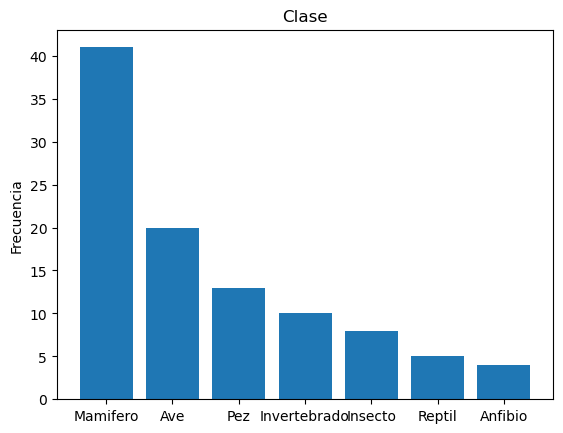

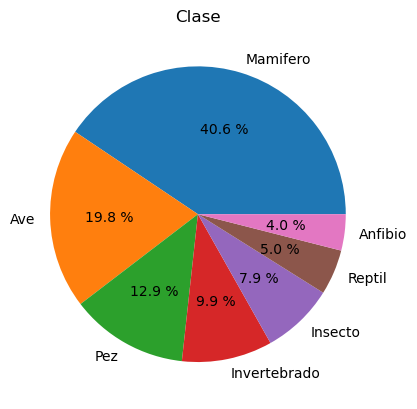

In [7]:
### Gráfico por Clase


target = "Clase"
barras = df[target].value_counts()
print(barras)

plt.figure()
N = len(barras)
plt.bar(np.arange( N ), barras)  # Gráfico de barras
plt.title(target)      # Colocamos el título
plt.ylabel('Frecuencia')
# Colocamos las etiquetas del eje x
plt.xticks(np.arange( N ), barras.index)
plt.show()


plt.pie(barras,labels=barras.index, autopct="%0.1f %%")
plt.title(target)
plt.show()

## Posibles problemas al entrenar perceptron: desbalanceo de clases
### hay una clase que tiene muchos más ejemplos (como mamíferos) y otras clases con pocos ejemplos (como anfibios), el modelo puede aprender a predecir predominantemente la clase mayoritaria, ignorando o mal clasificando las clases minoritarias.

### inciso (b)

## Entrenamiento

In [14]:
## ANTES de comenzar el entrenamiento, elimino la columna 'animal' (nombre del animal) porque no aporta no aporta información útil para entrenar 
## el perceptrón, ya que los nombres son datos categóricos que no tienen una relación directa con las características que el modelo debe aprender a clasificar.

df_sin_nombres = df.drop(columns=['animal'])

In [16]:
#--- DATOS DE ENTRENAMIENTO ---
X = np.array(df_sin_nombres.iloc[:,:-1])   ## datos de entrada: todas las columnas menos 'Clase'
T = np.array((df_sin_nombres['Clase'] == 'Mamifero') * 1)  
                                         
nColum = ['Otra', 'Mamifero']

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split(     #Se dividen los datos en conjuntos de entrenamiento y testeo.
        X, T, test_size=0.30, random_state=42)                           #El 30% de los datos se reserva para testear el modelo, mientras que el 70% restante se usa para entrenar.

normalizarEntrada = 1  # 1 si normaliza; 0 si no      
if normalizarEntrada:
    #--- Normalización lineal entre 0 y 1 ---
    normalizador = preprocessing.MinMaxScaler()

    # Normaliza utilizando la media y el desvio
    # normalizador= preprocessing.StandardScaler()
    
    X_train = normalizador.fit_transform(X_train)
    X_test  = normalizador.transform(X_test)

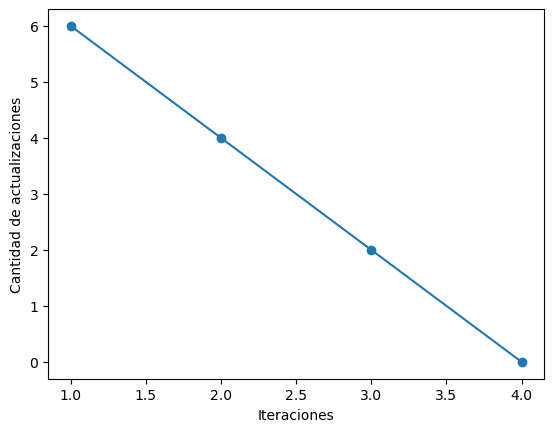

In [18]:
ppn = Perceptron(alpha=0.05, n_iter=200, random_state=None)
# alpha=0.01 --> tasa de aprendizaje
# n_iter=65 --> es cuántas veces el algoritmo pasa por todo el conjunto de entrenamiento para ajustar los pesos
# random_state=None --> Esto controla la inicialización aleatoria del modelo. Si es None, la inicialización será diferente cada vez que corras el script.

ppn.fit(X_train, T_train) #  Esta línea entrena el perceptrón utilizando los datos de entrenamiento (X_train) y las etiquetas (T_train).   
                          # Durante este proceso, el perceptrón ajusta sus pesos para minimizar los errores en la predicción.

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

# ppn.errors_: Durante el entrenamiento, el perceptrón guarda en esta lista la cantidad de errores de clasificación o actualizaciones de pesos que ocurrieron en cada iteración.
# plt.plot(...): Esta línea genera un gráfico de la cantidad de errores en función del número de iteraciones.
#Idealmente, deberías ver que la cantidad de errores disminuye a medida que el modelo aprende, lo que indicaría que el perceptrón está convergiendo hacia una solución óptima.

In [20]:
Y_test = ppn.predict(X_test)

aciertos = sum(Y_test == T_test)
print("aciertos = ", aciertos)

nAciertos = sum(Y_test == T_test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_test.shape[0]))


aciertos =  29
% de aciertos = 93.55 %


### conclusion: al segundo entrenamiento, me da una precision del 100%

# Analizo los pesos finales

In [56]:
# Mostrar los pesos del perceptrón
print("Pesos finales:")
print(ppn.w_)

# Mostrar el sesgo (intercepto) del perceptrón
print("Sesgo (intercepto):")
print(ppn.b_)

#  visualizar la importancia de cada característica:

# Crear un DataFrame para las características y sus pesos

weights_df = pd.DataFrame({
    #'Característica': df.columns
    'Característica': df_sin_nombres.columns[:-1],  # Todas las columnas menos la última (Clase)
    'Peso': ppn.w_.flatten()  # Aplanar el array de pesos
})

# Ordenar las características por peso absoluto (más relevante primero)
weights_df['Peso Absoluto'] = weights_df['Peso'].abs()
weights_df = weights_df.sort_values(by='Peso Absoluto', ascending=False)

print("Importancia de las características:")
print(weights_df)


Pesos finales:
[ 0.45925853 -0.38223459 -0.29238912  0.37894834  0.11926641 -0.25950404
  0.1277373   0.23471613  0.04275456 -0.1648146  -0.36752935  0.03614311
 -0.12659863  0.14371487 -0.40774239 -0.26635165]
Sesgo (intercepto):
-0.10217887216010584
Importancia de las características:
   Característica      Peso  Peso Absoluto
0      Tiene_Pelo  0.459259       0.459259
14      Domestico -0.407742       0.407742
1    Tiene_Plumas -0.382235       0.382235
3      Toma_Leche  0.378948       0.378948
10       Venenoso -0.367529       0.367529
2   Nace_de_huevo -0.292389       0.292389
15    Tamano_Gato -0.266352       0.266352
5        Acuatico -0.259504       0.259504
7         Dentado  0.234716       0.234716
9         Respira -0.164815       0.164815
13     Tiene_Cola  0.143715       0.143715
6      Depredador  0.127737       0.127737
12     Cant_Patas -0.126599       0.126599
4           Vuela  0.119266       0.119266
8      Vertebrado  0.042755       0.042755
11   Tiene_Aletas  0.036

### Los pesos más altos en valor absoluto indican características más importantes para la decisión del modelo
### Para decidir si es un mamifero, la caracteristicas mas importantes son: Tiene_Pelo y Domestico

# Inciso (d) - Prediccion de aves

In [65]:
## ANTES de comenzar el entrenamiento, elimino la columna 'animal' (nombre del animal) porque no aporta no aporta información útil para entrenar 
## el perceptrón, ya que los nombres son datos categóricos que no tienen una relación directa con las características que el modelo debe aprender a clasificar.

df_sin_nombres = df.drop(columns=['animal'])

In [67]:
#--- DATOS DE ENTRENAMIENTO ---
X = np.array(df_sin_nombres.iloc[:,:-1])   ## datos de entrada: todas las columnas menos 'Clase'
T = np.array((df_sin_nombres['Clase'] == 'Ave') * 1)  
                                         
nColum = ['Otra', 'Ave']

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split(     #Se dividen los datos en conjuntos de entrenamiento y testeo.
        X, T, test_size=0.30, random_state=42)                           #El 30% de los datos se reserva para testear el modelo, mientras que el 70% restante se usa para entrenar.

normalizarEntrada = 1  # 1 si normaliza; 0 si no      
if normalizarEntrada:
    #--- Normalización lineal entre 0 y 1 ---
    normalizador = preprocessing.MinMaxScaler()

    # Normaliza utilizando la media y el desvio
    # normalizador= preprocessing.StandardScaler()
    
    X_train = normalizador.fit_transform(X_train)
    X_test  = normalizador.transform(X_test)

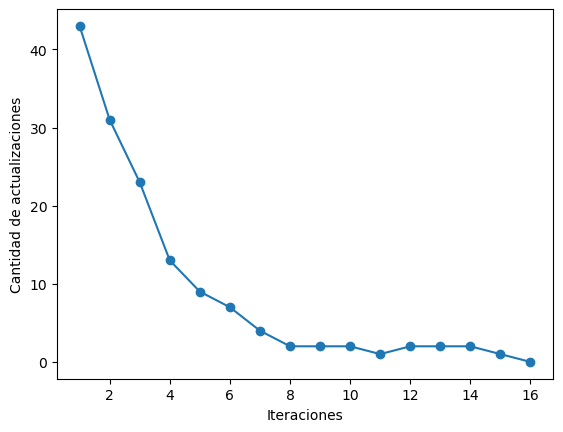

In [69]:
ppn = Perceptron(alpha=0.01, n_iter=650, random_state=None)
# alpha=0.01 --> tasa de aprendizaje
# n_iter=65 --> es cuántas veces el algoritmo pasa por todo el conjunto de entrenamiento para ajustar los pesos
# random_state=None --> Esto controla la inicialización aleatoria del modelo. Si es None, la inicialización será diferente cada vez que corras el script.

ppn.fit(X_train, T_train) #  Esta línea entrena el perceptrón utilizando los datos de entrenamiento (X_train) y las etiquetas (T_train).   
                          # Durante este proceso, el perceptrón ajusta sus pesos para minimizar los errores en la predicción.

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

# ppn.errors_: Durante el entrenamiento, el perceptrón guarda en esta lista la cantidad de errores de clasificación o actualizaciones de pesos que ocurrieron en cada iteración.
# plt.plot(...): Esta línea genera un gráfico de la cantidad de errores en función del número de iteraciones.
#Idealmente, deberías ver que la cantidad de errores disminuye a medida que el modelo aprende, lo que indicaría que el perceptrón está convergiendo hacia una solución óptima.

In [71]:
Y_test = ppn.predict(X_test)

aciertos = sum(Y_test == T_test)
print("aciertos = ", aciertos)

nAciertos = sum(Y_test == T_test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_test.shape[0]))


aciertos =  30
% de aciertos = 96.77 %


In [73]:
# Mostrar los pesos del perceptrón
print("Pesos finales:")
print(ppn.w_)

# Mostrar el sesgo (intercepto) del perceptrón
print("Sesgo (intercepto):")
print(ppn.b_)

#  visualizar la importancia de cada característica:

# Crear un DataFrame para las características y sus pesos

weights_df = pd.DataFrame({
    #'Característica': df.columns
    'Característica': df_sin_nombres.columns[:-1],  # Todas las columnas menos la última (Clase)
    'Peso': ppn.w_.flatten()  # Aplanar el array de pesos
})

# Ordenar las características por peso absoluto (más relevante primero)
weights_df['Peso Absoluto'] = weights_df['Peso'].abs()
weights_df = weights_df.sort_values(by='Peso Absoluto', ascending=False)

print("Importancia de las características:")
print(weights_df)


Pesos finales:
[-0.31939786  0.10123299 -0.31446962 -0.16199152  0.02124897  0.11615491
 -0.03408242 -0.26618033 -0.23861075  0.19500116 -0.33023639 -0.18379527
 -0.01877377  0.42280952  0.20662229 -0.12884644]
Sesgo (intercepto):
0.018466389299105164
Importancia de las características:
   Característica      Peso  Peso Absoluto
13     Tiene_Cola  0.422810       0.422810
10       Venenoso -0.330236       0.330236
0      Tiene_Pelo -0.319398       0.319398
2   Nace_de_huevo -0.314470       0.314470
7         Dentado -0.266180       0.266180
8      Vertebrado -0.238611       0.238611
14      Domestico  0.206622       0.206622
9         Respira  0.195001       0.195001
11   Tiene_Aletas -0.183795       0.183795
3      Toma_Leche -0.161992       0.161992
15    Tamano_Gato -0.128846       0.128846
5        Acuatico  0.116155       0.116155
1    Tiene_Plumas  0.101233       0.101233
6      Depredador -0.034082       0.034082
4           Vuela  0.021249       0.021249
12     Cant_Patas -0.018

### Los pesos más altos en valor absoluto indican características más importantes para la decisión del modelo
### Para decidir si es un Ave, la caracteristicas mas importantes son: Tiene_Cola y Venenoso

# Inciso (e) - Prediccion de Reptiles

In [87]:
## ANTES de comenzar el entrenamiento, elimino la columna 'animal' (nombre del animal) porque no aporta no aporta información útil para entrenar 
## el perceptrón, ya que los nombres son datos categóricos que no tienen una relación directa con las características que el modelo debe aprender a clasificar.

df_sin_nombres = df.drop(columns=['animal'])

In [89]:
#--- DATOS DE ENTRENAMIENTO ---
X = np.array(df_sin_nombres.iloc[:,:-1])   ## datos de entrada: todas las columnas menos 'Clase'
T = np.array((df_sin_nombres['Clase'] == 'Reptil') * 1)  
                                         
nColum = ['Otra', 'Reptil']

#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, T_train, T_test = model_selection.train_test_split(     #Se dividen los datos en conjuntos de entrenamiento y testeo.
        X, T, test_size=0.30, random_state=42)                           #El 30% de los datos se reserva para testear el modelo, mientras que el 70% restante se usa para entrenar.

normalizarEntrada = 1  # 1 si normaliza; 0 si no      
if normalizarEntrada:
    #--- Normalización lineal entre 0 y 1 ---
    normalizador = preprocessing.MinMaxScaler()

    # Normaliza utilizando la media y el desvio
    # normalizador= preprocessing.StandardScaler()
    
    X_train = normalizador.fit_transform(X_train)
    X_test  = normalizador.transform(X_test)

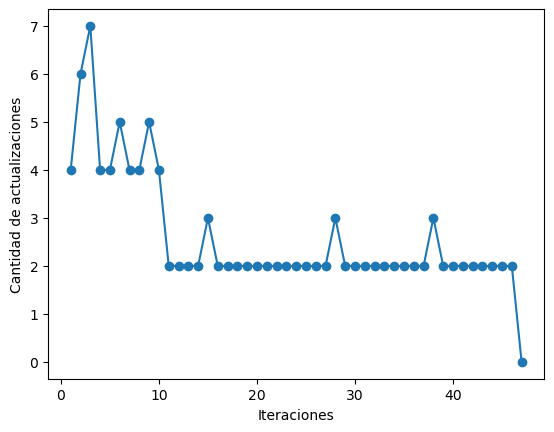

In [91]:
ppn = Perceptron(alpha=0.01, n_iter=650, random_state=None)
# alpha=0.01 --> tasa de aprendizaje
# n_iter=65 --> es cuántas veces el algoritmo pasa por todo el conjunto de entrenamiento para ajustar los pesos
# random_state=None --> Esto controla la inicialización aleatoria del modelo. Si es None, la inicialización será diferente cada vez que corras el script.

ppn.fit(X_train, T_train) #  Esta línea entrena el perceptrón utilizando los datos de entrenamiento (X_train) y las etiquetas (T_train).   
                          # Durante este proceso, el perceptrón ajusta sus pesos para minimizar los errores en la predicción.

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('Cantidad de actualizaciones')
plt.show()

# ppn.errors_: Durante el entrenamiento, el perceptrón guarda en esta lista la cantidad de errores de clasificación o actualizaciones de pesos que ocurrieron en cada iteración.
# plt.plot(...): Esta línea genera un gráfico de la cantidad de errores en función del número de iteraciones.
#Idealmente, deberías ver que la cantidad de errores disminuye a medida que el modelo aprende, lo que indicaría que el perceptrón está convergiendo hacia una solución óptima.

In [93]:
Y_test = ppn.predict(X_test)

aciertos = sum(Y_test == T_test)
print("aciertos = ", aciertos)

nAciertos = sum(Y_test == T_test)
print("%% de aciertos = %.2f %%" % (100*nAciertos/X_test.shape[0]))


aciertos =  30
% de aciertos = 96.77 %


In [95]:
# Mostrar los pesos del perceptrón
print("Pesos finales:")
print(ppn.w_)

# Mostrar el sesgo (intercepto) del perceptrón
print("Sesgo (intercepto):")
print(ppn.b_)

#  visualizar la importancia de cada característica:

# Crear un DataFrame para las características y sus pesos

weights_df = pd.DataFrame({
    #'Característica': df.columns
    'Característica': df_sin_nombres.columns[:-1],  # Todas las columnas menos la última (Clase)
    'Peso': ppn.w_.flatten()  # Aplanar el array de pesos
})

# Ordenar las características por peso absoluto (más relevante primero)
weights_df['Peso Absoluto'] = weights_df['Peso'].abs()
weights_df = weights_df.sort_values(by='Peso Absoluto', ascending=False)

print("Importancia de las características:")
print(weights_df)


Pesos finales:
[-0.39803241 -0.29920787  0.00376376 -0.00425439  0.116859   -0.51855399
 -0.0012608   0.09301446  0.16576901  0.16792671  0.09020599  0.30016518
 -0.18571394  0.0283665   0.00832693 -0.08297833]
Sesgo (intercepto):
-0.17223165561730314
Importancia de las características:
   Característica      Peso  Peso Absoluto
5        Acuatico -0.518554       0.518554
0      Tiene_Pelo -0.398032       0.398032
11   Tiene_Aletas  0.300165       0.300165
1    Tiene_Plumas -0.299208       0.299208
12     Cant_Patas -0.185714       0.185714
9         Respira  0.167927       0.167927
8      Vertebrado  0.165769       0.165769
4           Vuela  0.116859       0.116859
7         Dentado  0.093014       0.093014
10       Venenoso  0.090206       0.090206
15    Tamano_Gato -0.082978       0.082978
13     Tiene_Cola  0.028367       0.028367
14      Domestico  0.008327       0.008327
3      Toma_Leche -0.004254       0.004254
2   Nace_de_huevo  0.003764       0.003764
6      Depredador -0.001

## La caracteristica mas importante para la prediccion de Reptiles es si es acuatico